In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
DataDir = "archive/"

In [4]:
CATEGORIES = ['no','yes']

In [7]:
## intializing the size of the image 
img_size = 100

In [9]:
training_data = []
def create_training_data():
    for i in CATEGORIES:
        path = os.path.join(DataDir,i)
        class_num = CATEGORIES.index(i)
    for img in os.listdir(path):
        try:
            #conveting image into ggray scale
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            #resizing the image
            new_array = cv2.resize(img_array,(img_size,img_size))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass

In [10]:
create_training_data()

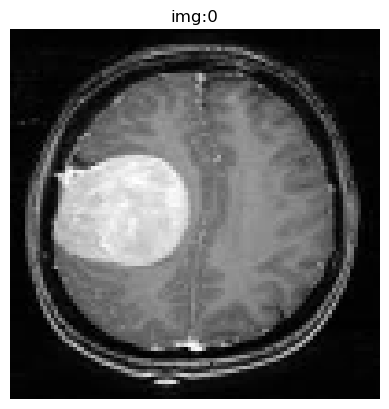

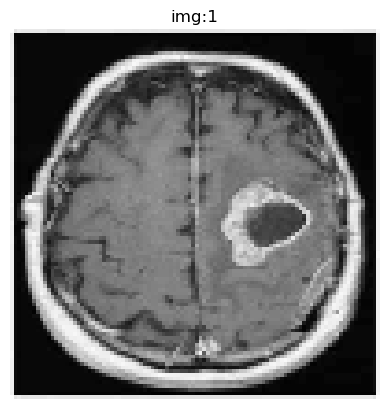

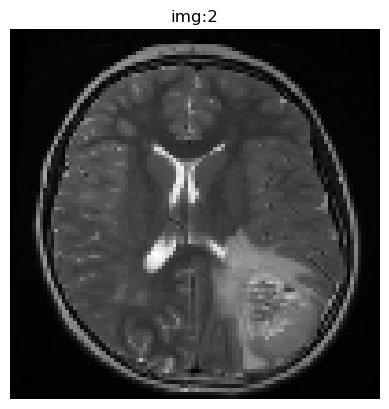

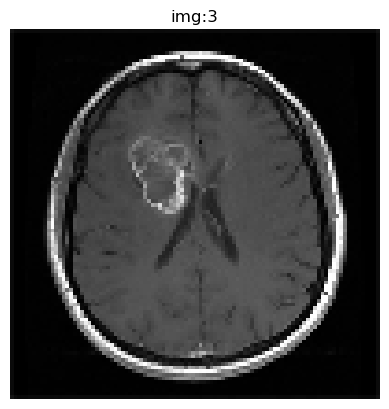

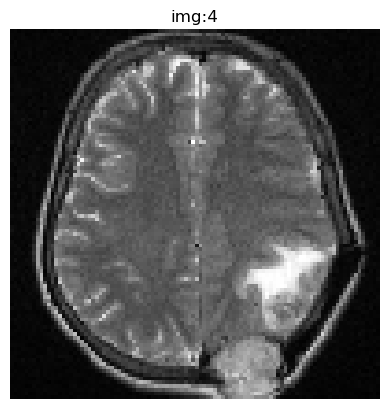

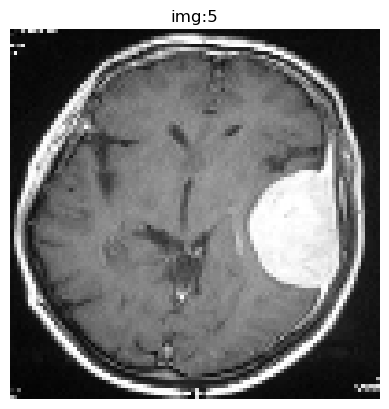

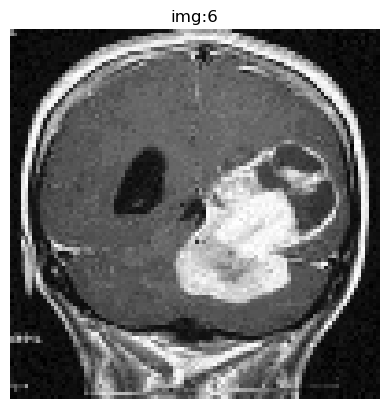

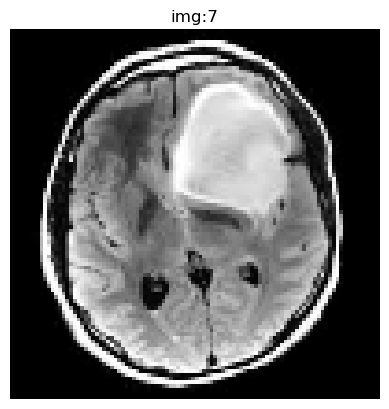

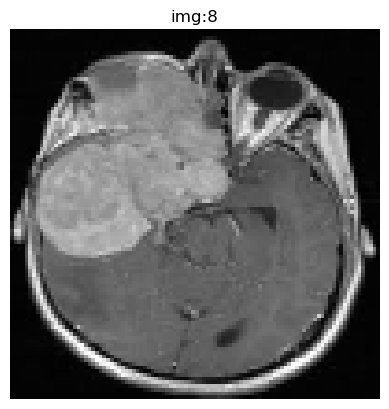

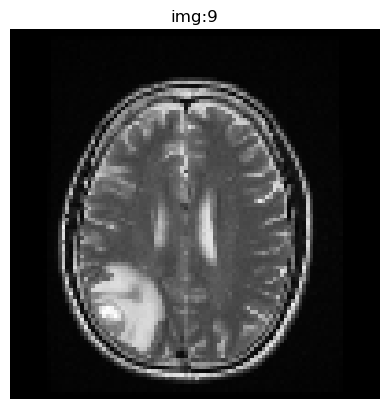

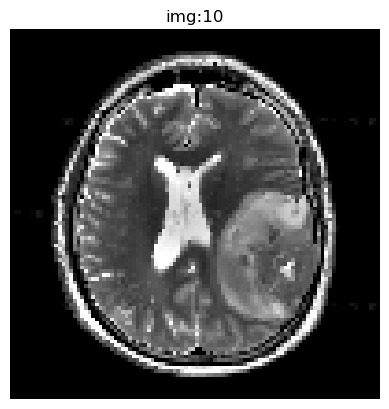

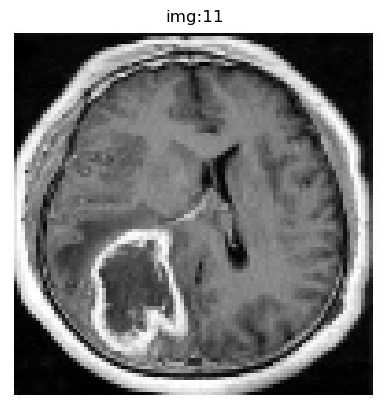

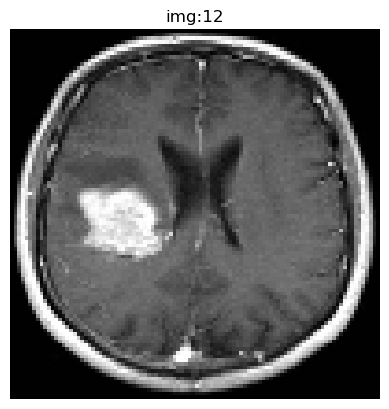

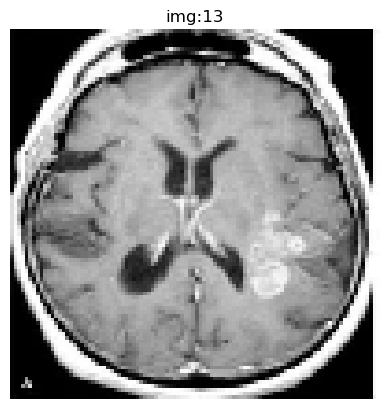

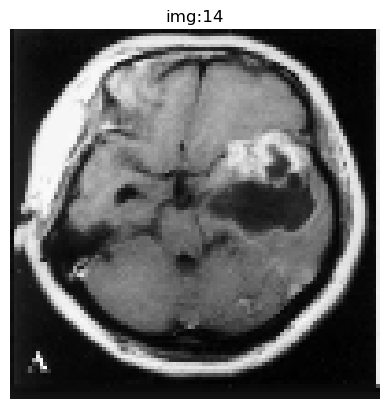

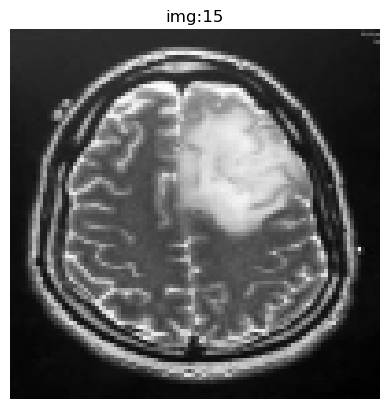

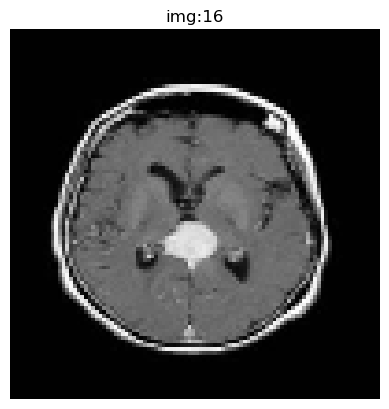

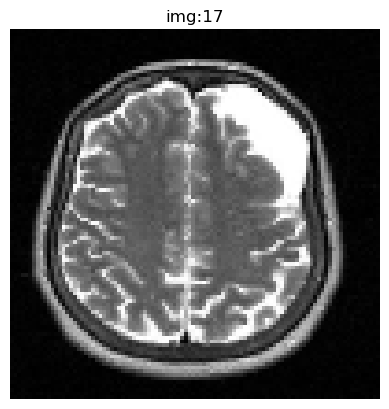

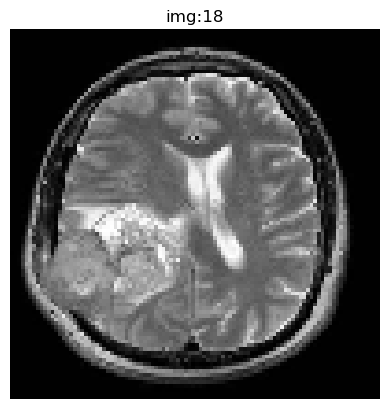

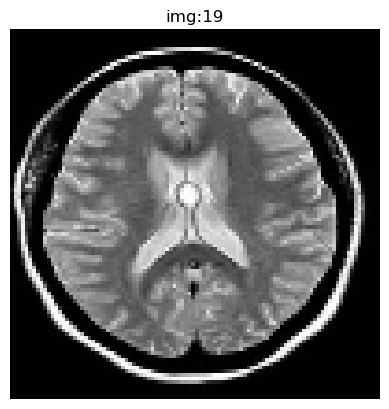

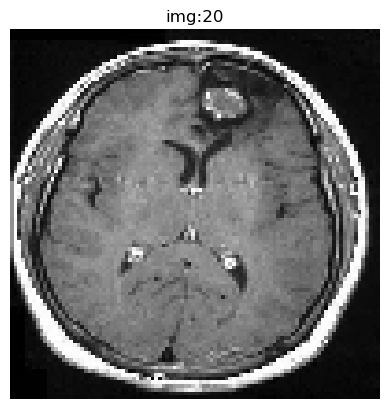

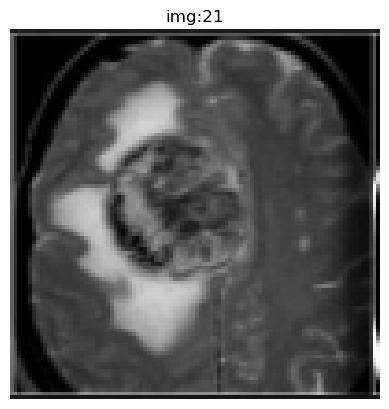

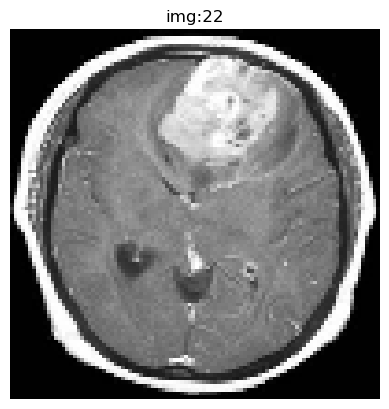

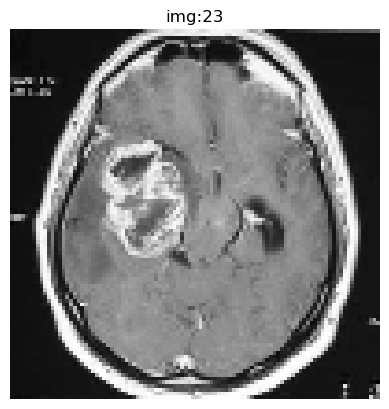

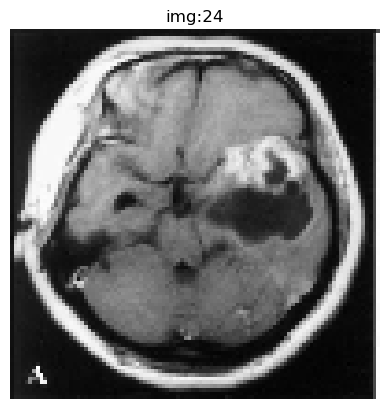

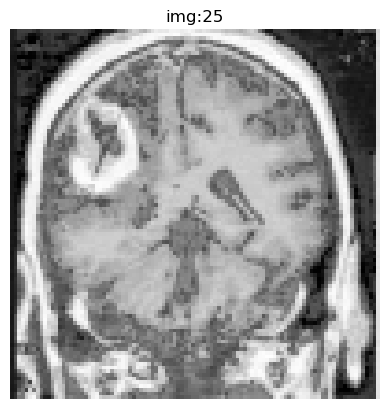

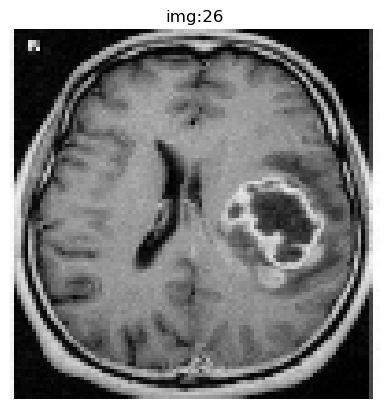

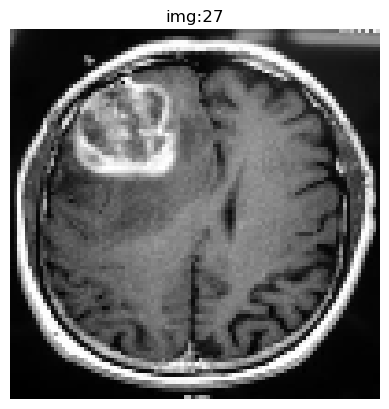

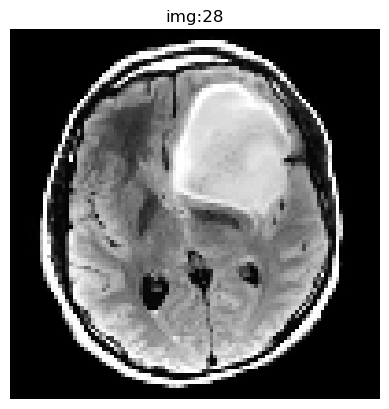

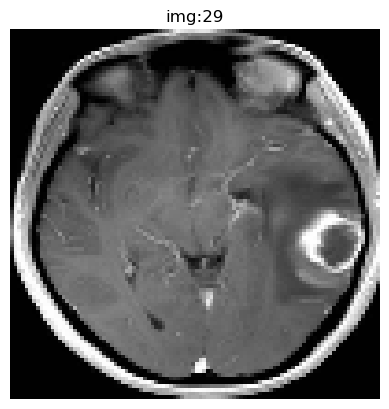

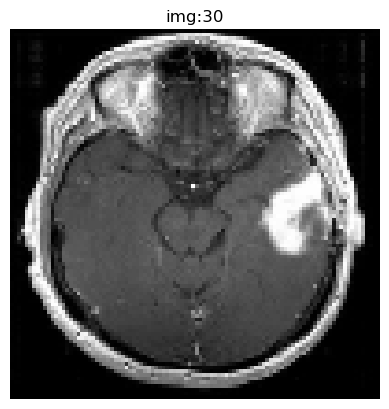

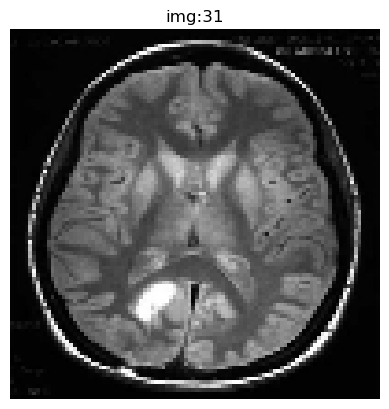

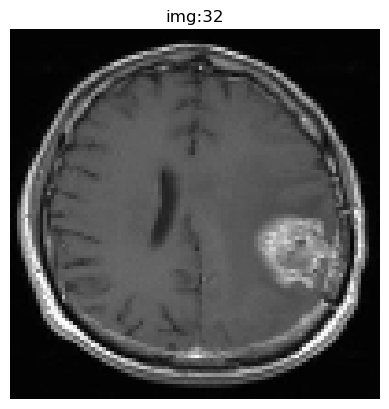

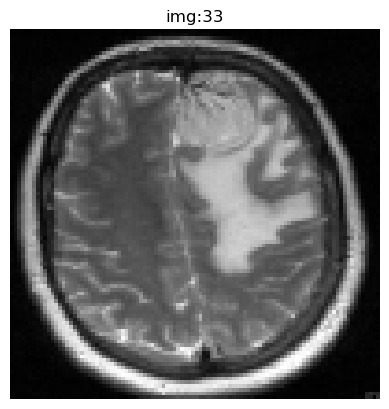

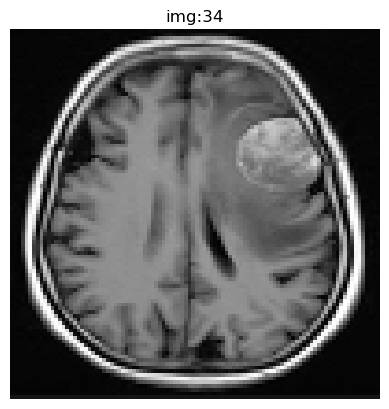

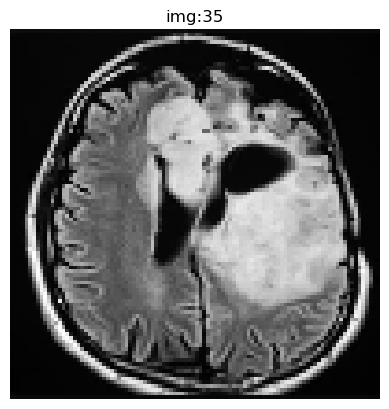

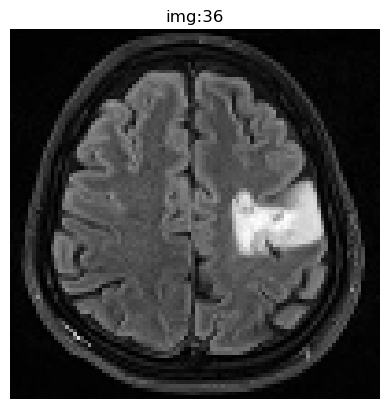

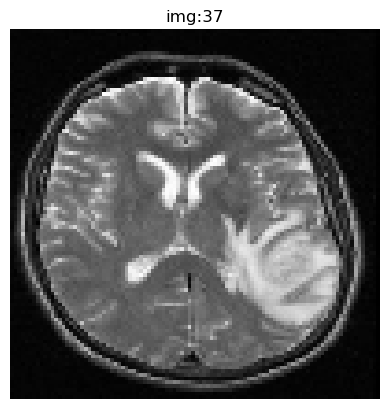

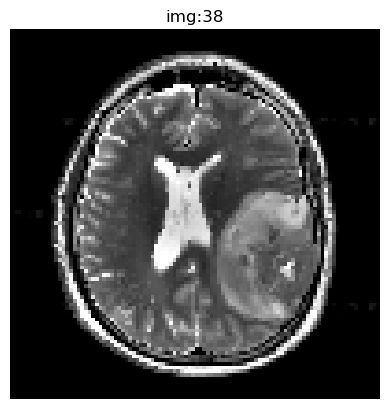

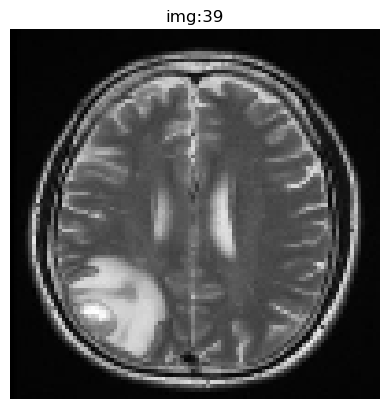

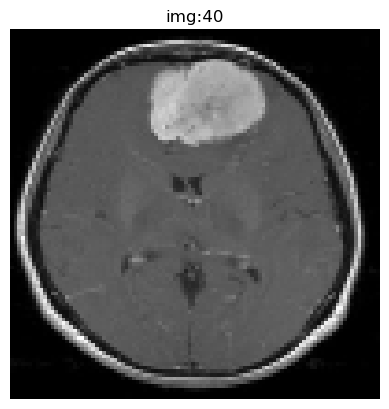

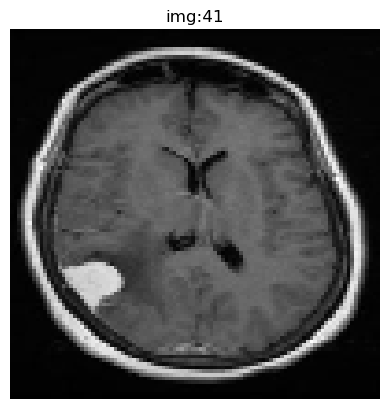

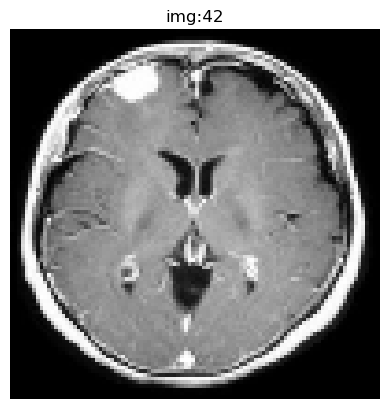

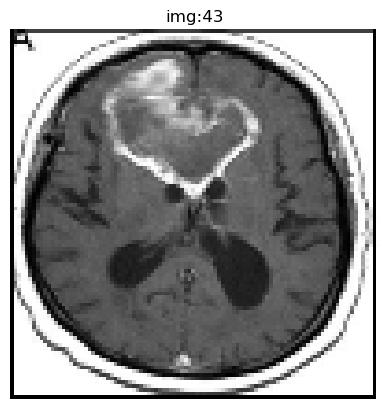

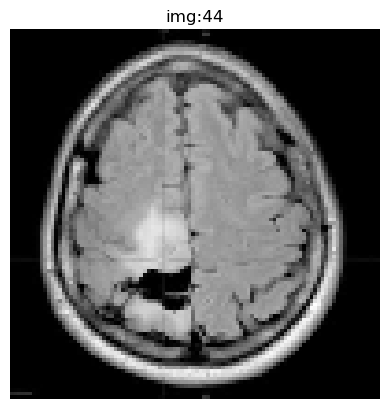

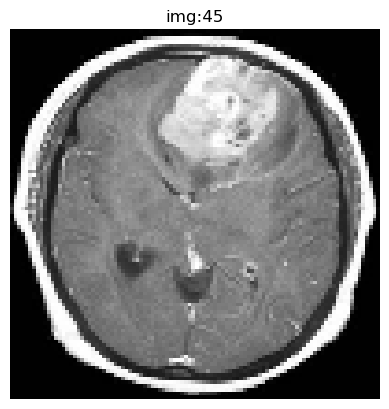

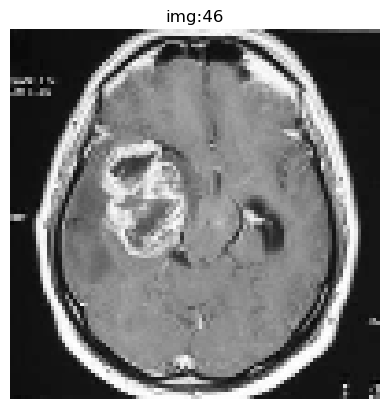

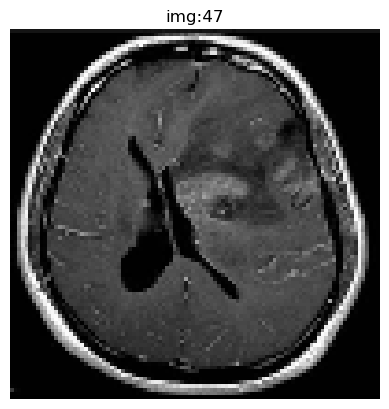

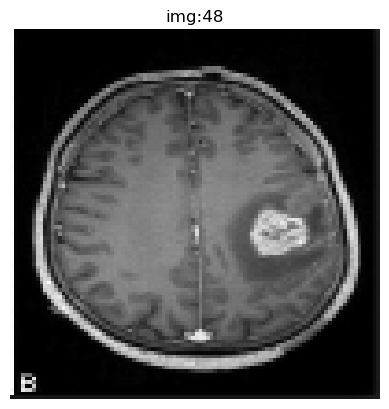

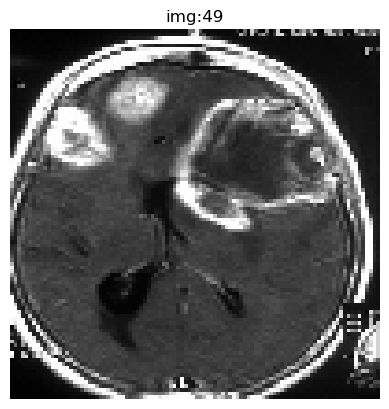

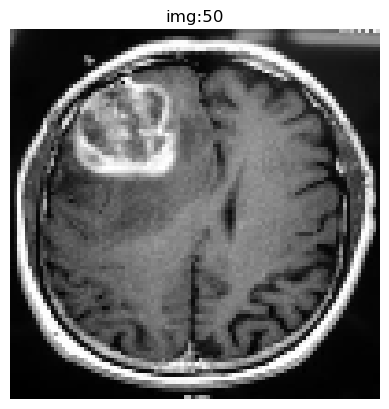

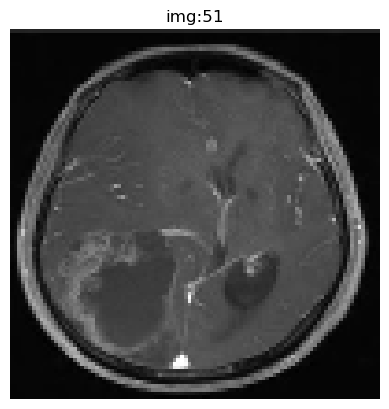

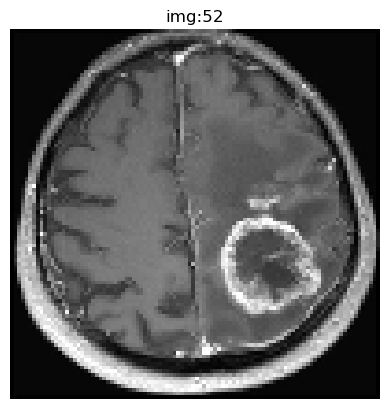

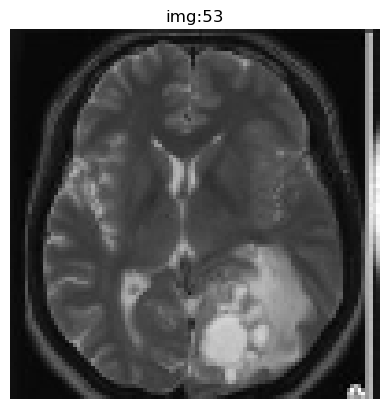

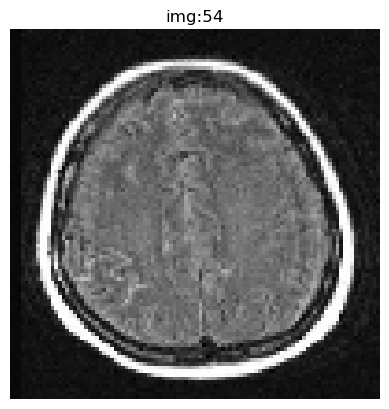

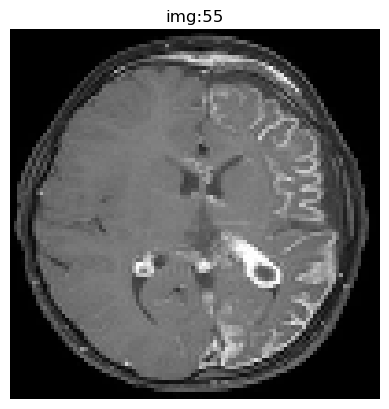

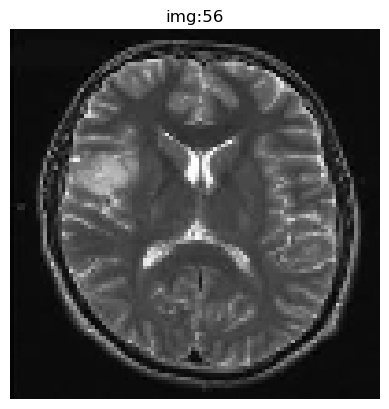

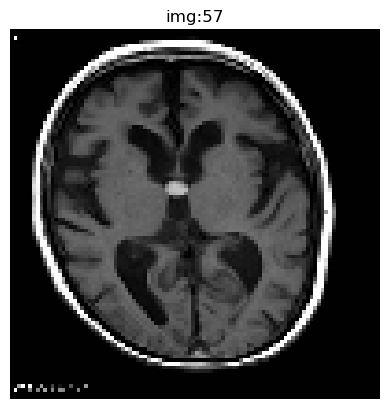

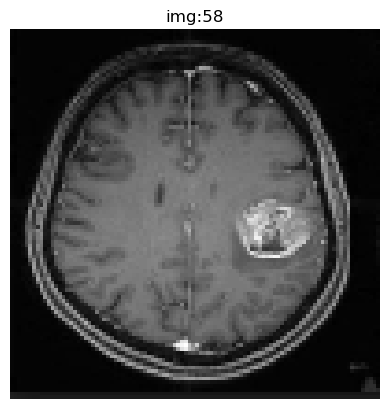

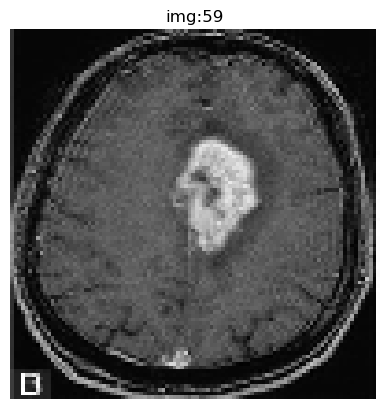

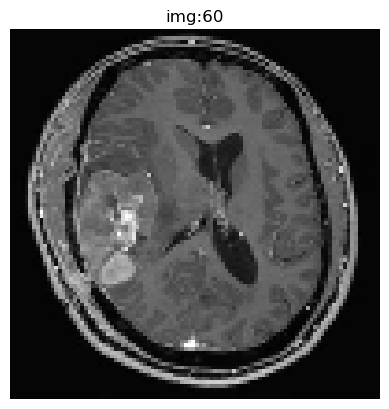

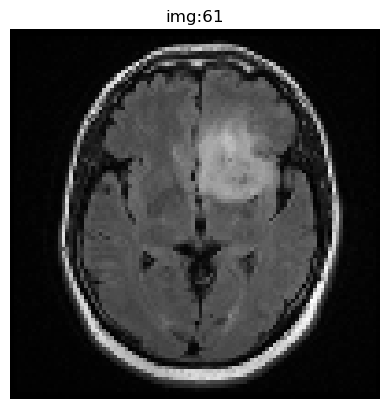

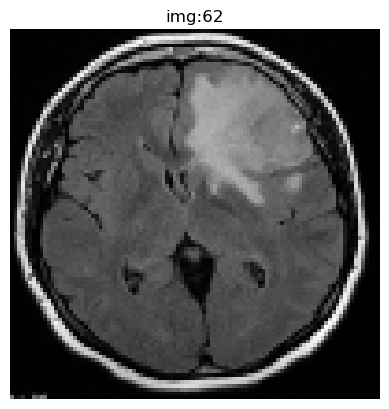

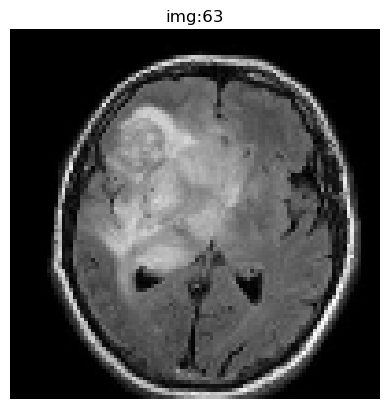

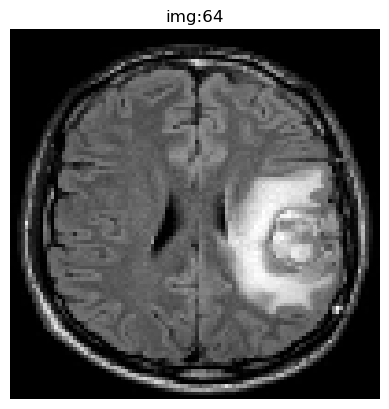

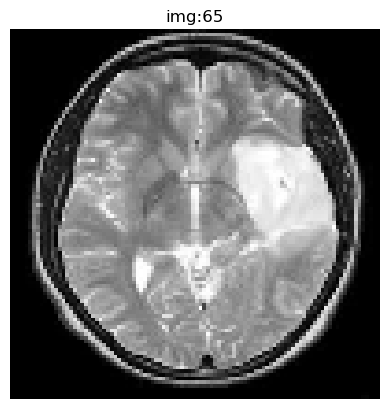

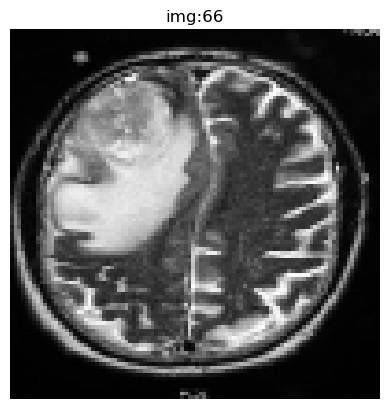

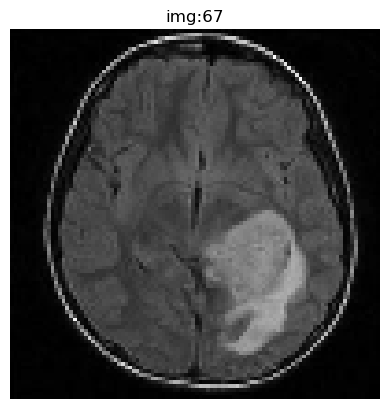

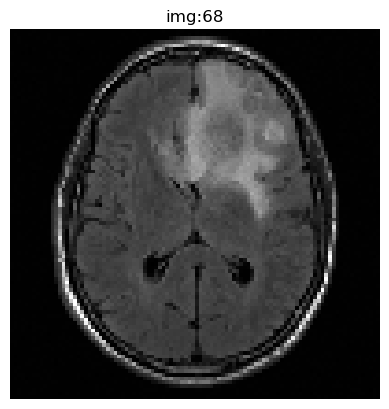

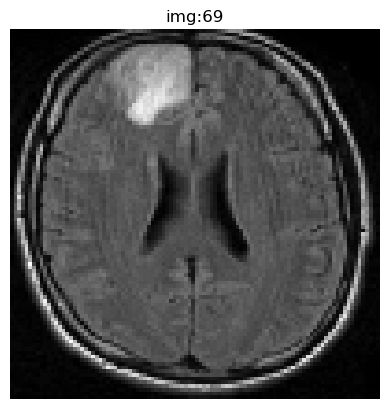

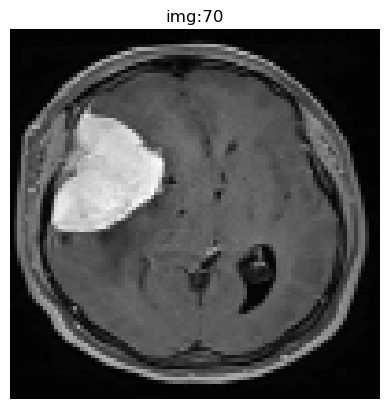

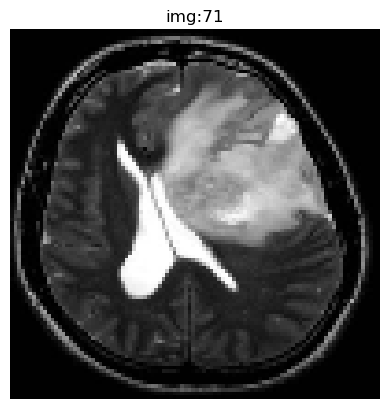

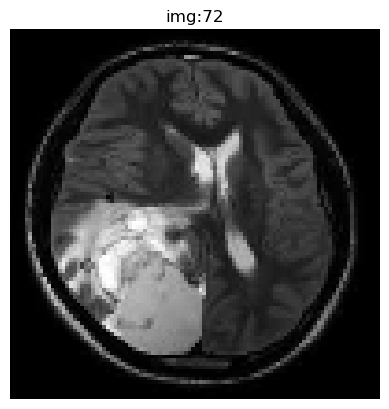

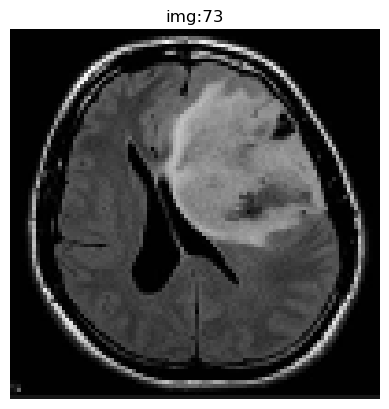

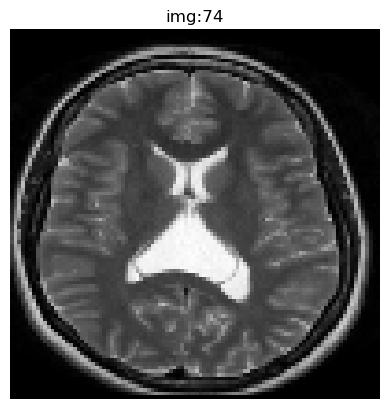

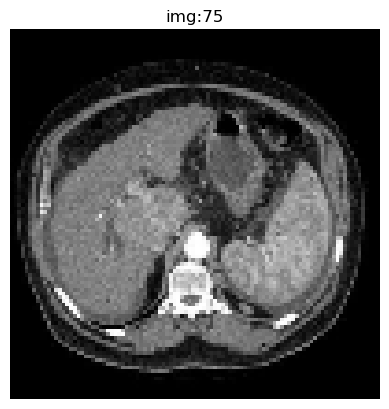

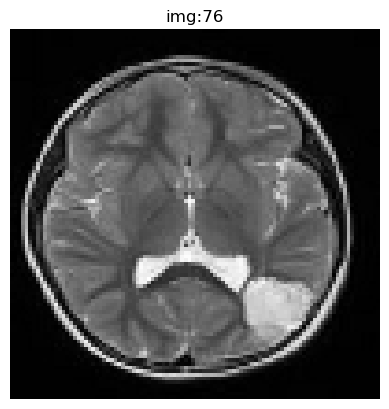

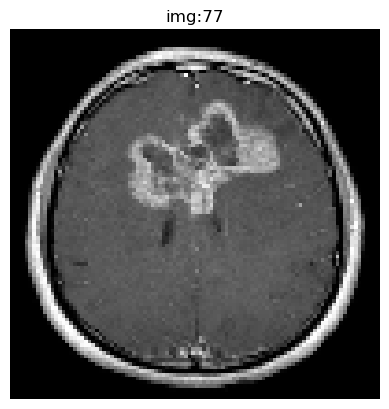

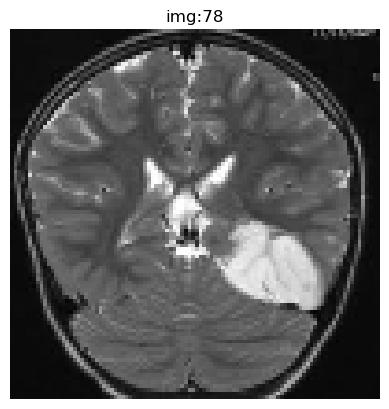

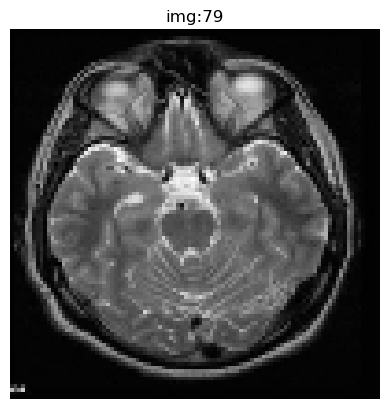

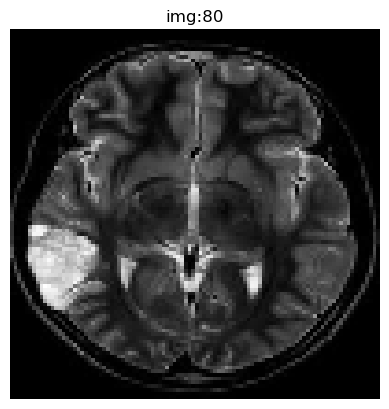

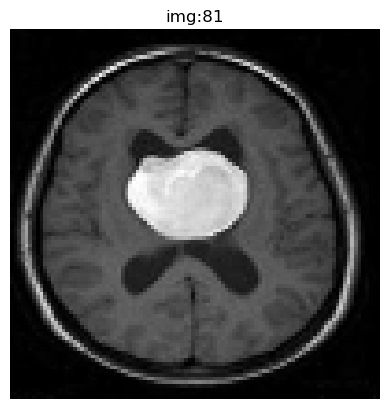

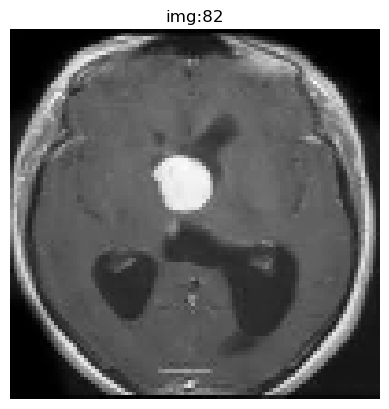

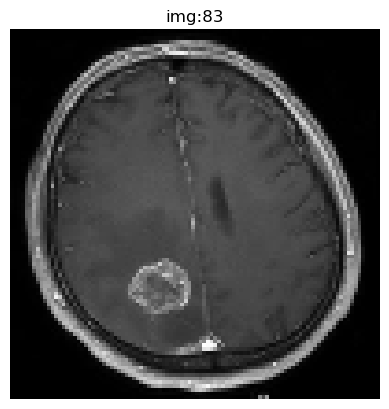

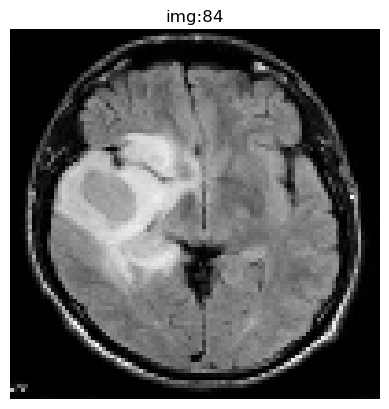

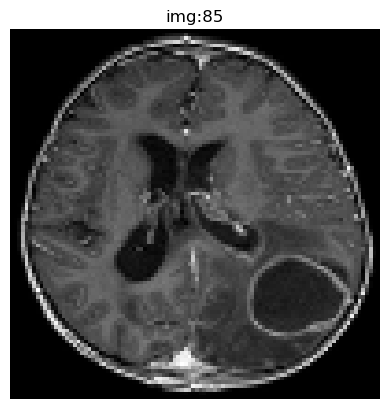

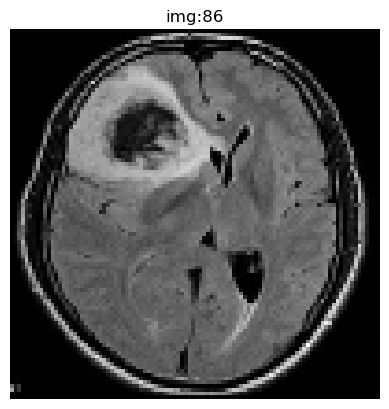

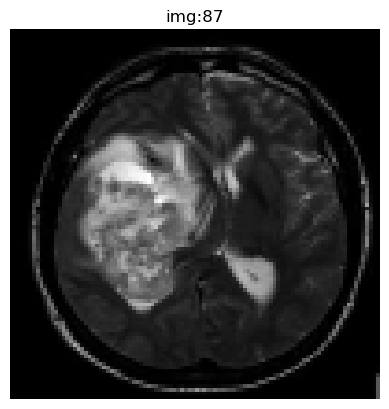

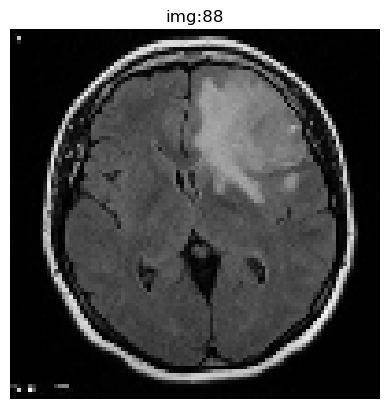

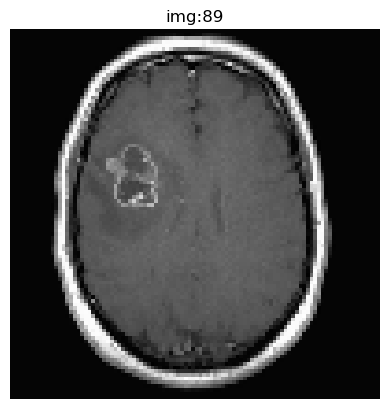

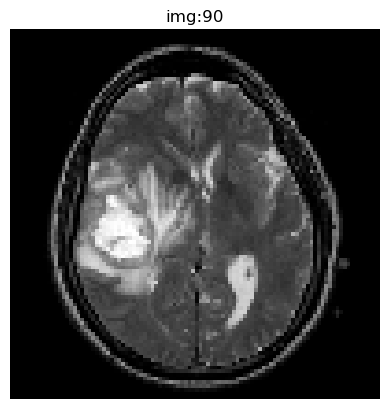

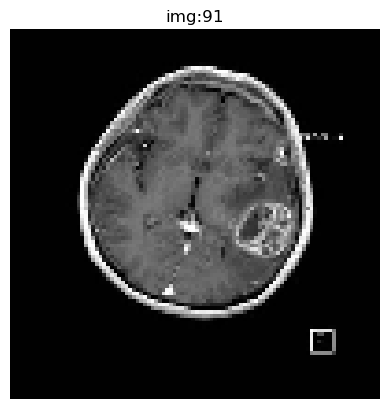

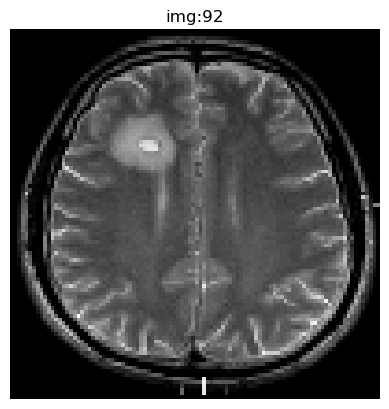

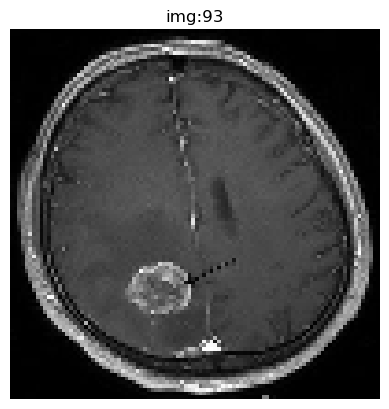

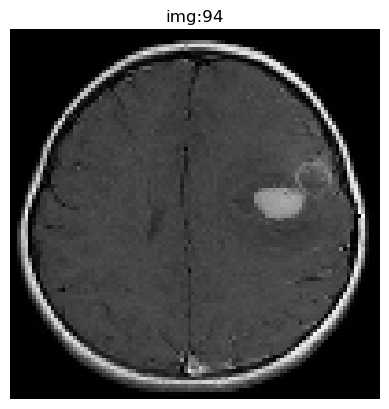

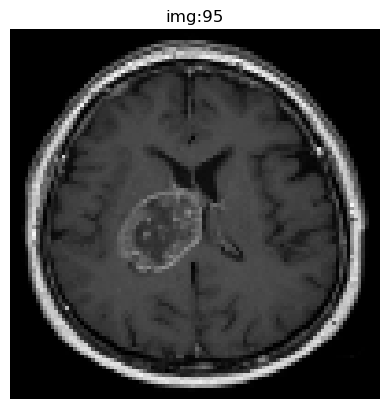

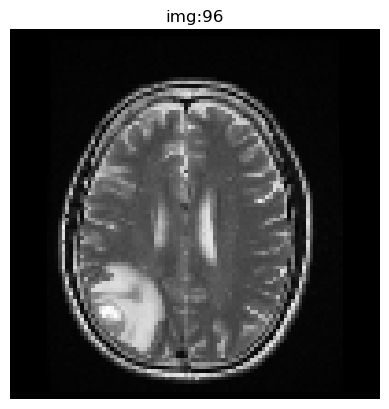

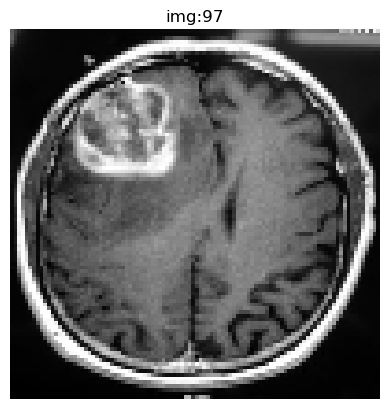

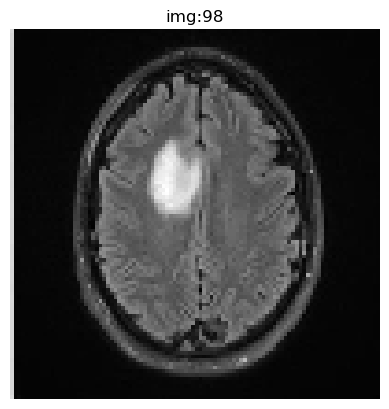

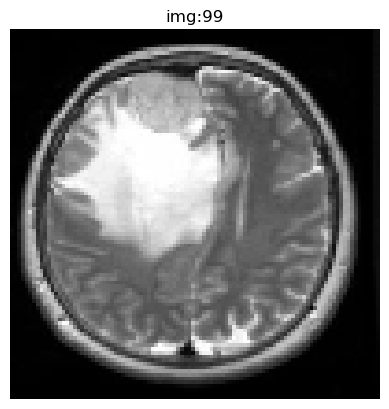

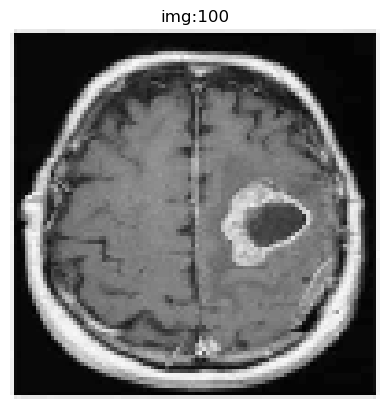

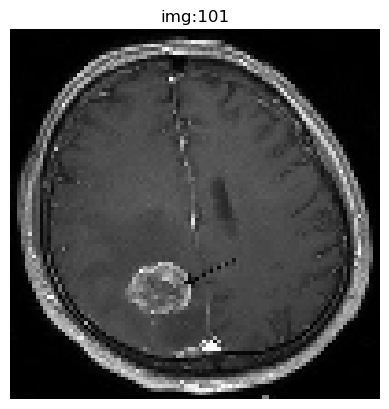

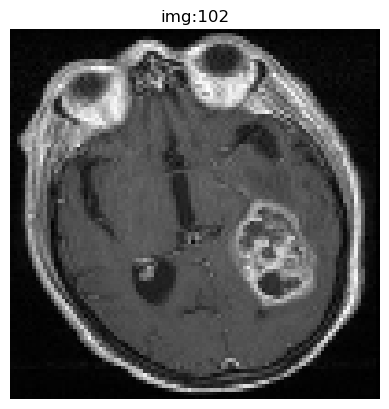

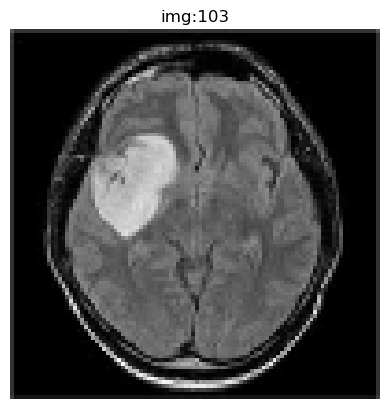

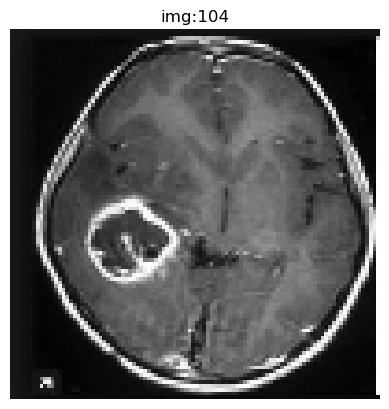

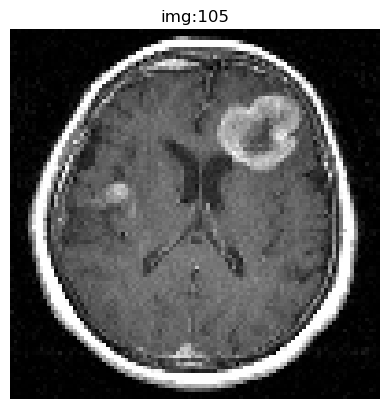

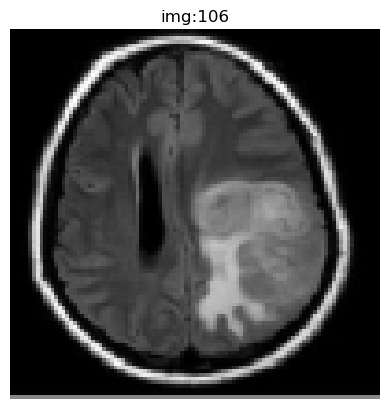

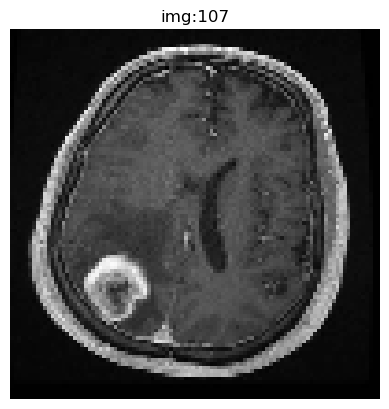

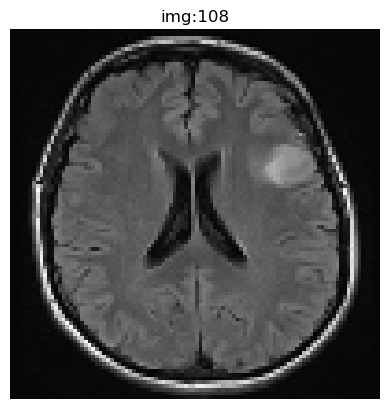

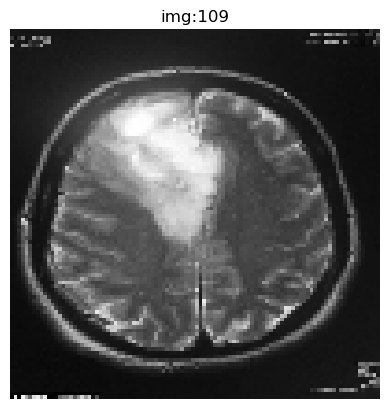

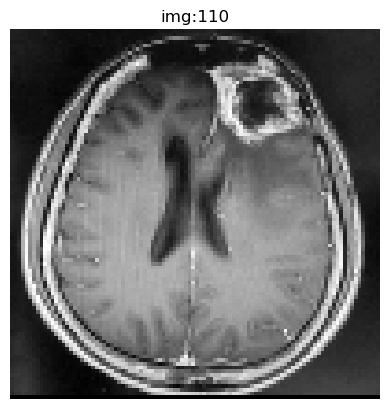

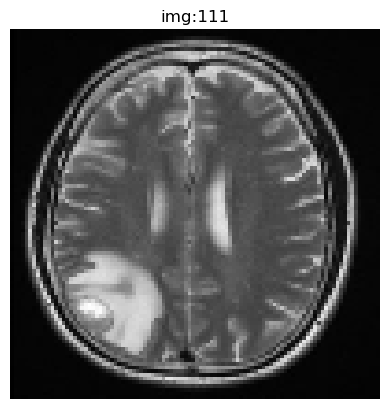

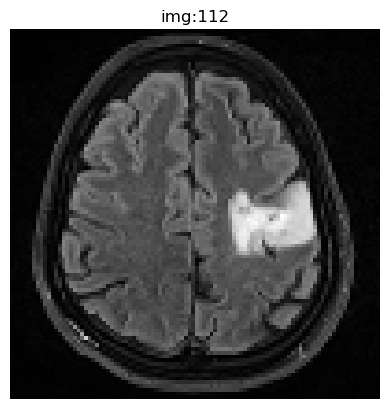

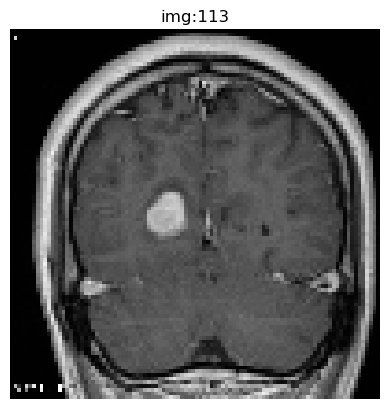

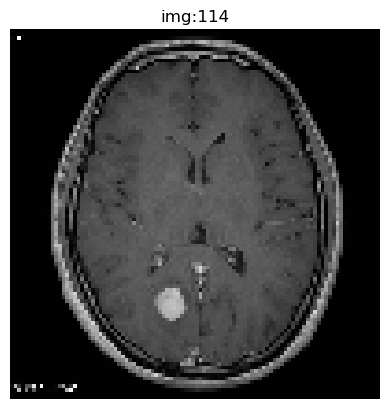

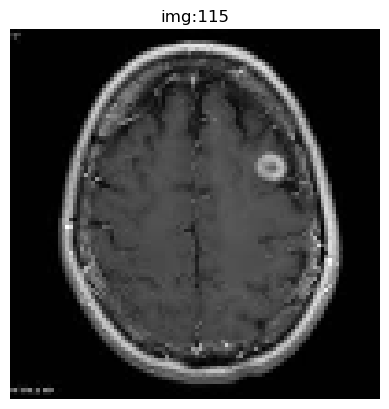

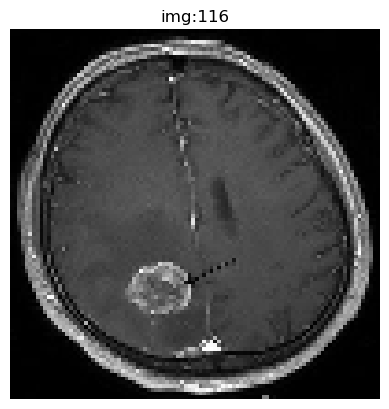

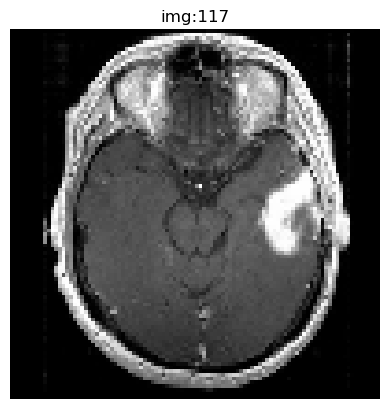

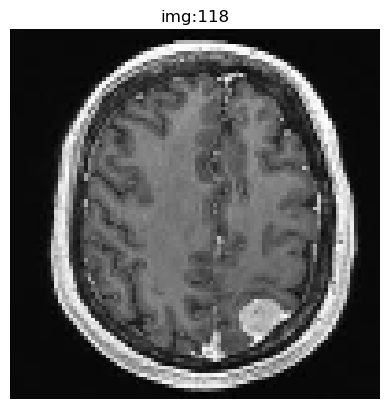

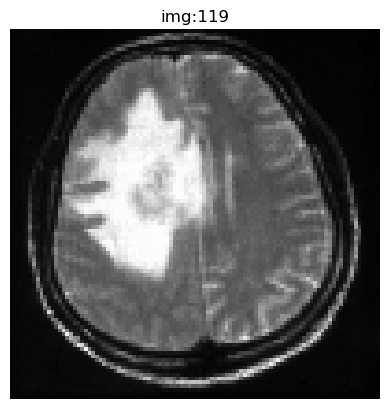

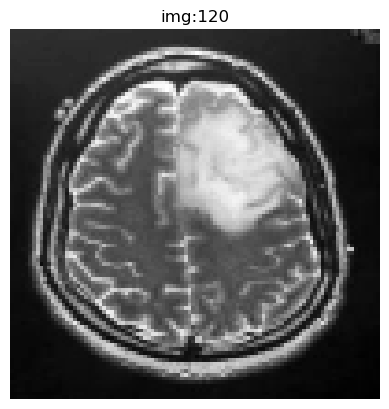

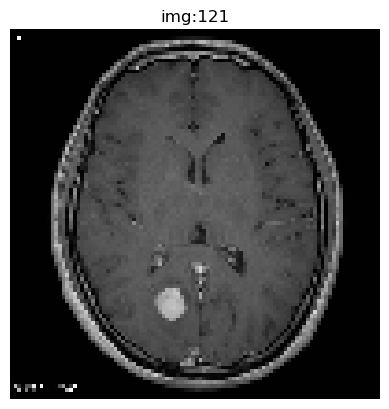

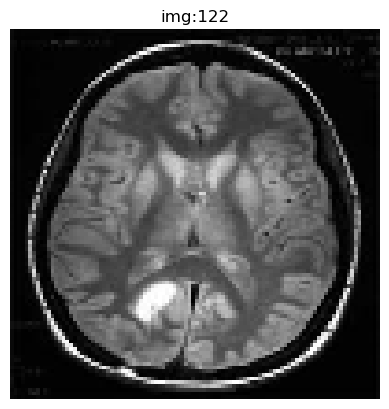

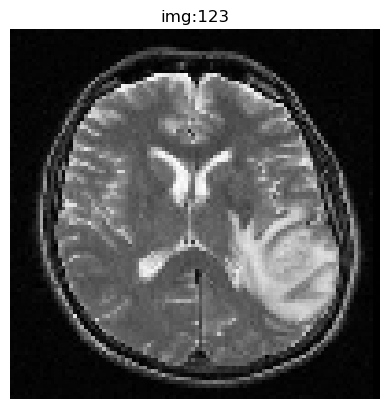

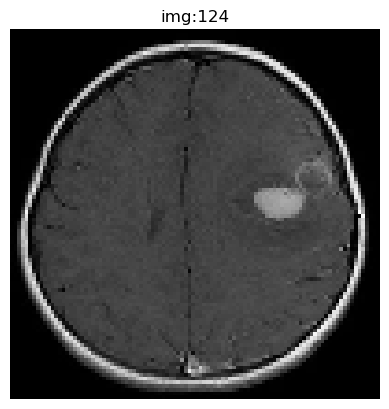

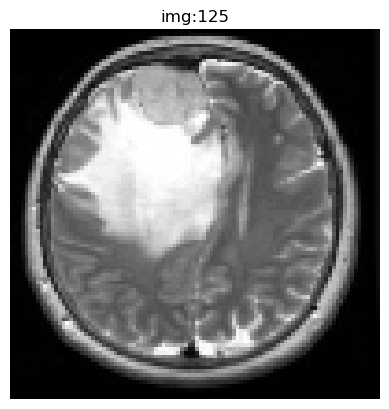

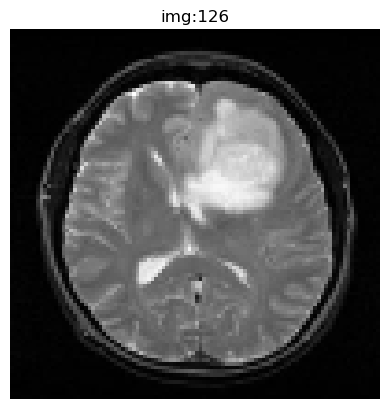

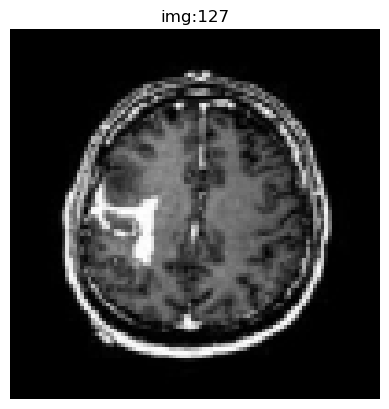

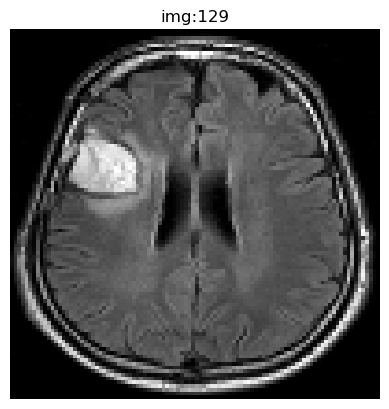

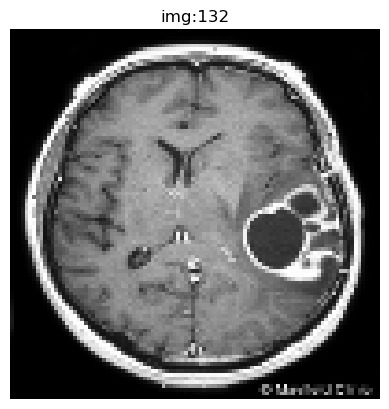

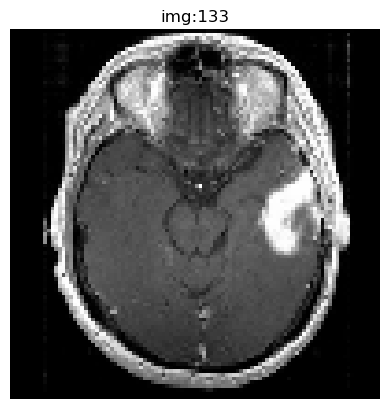

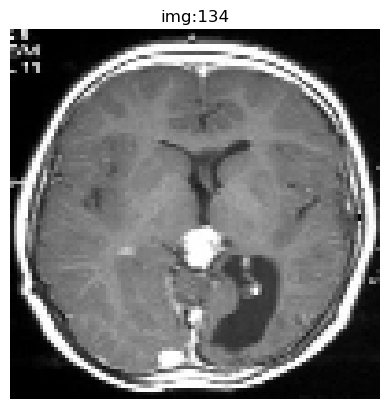

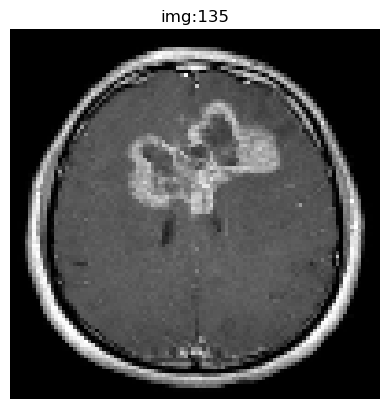

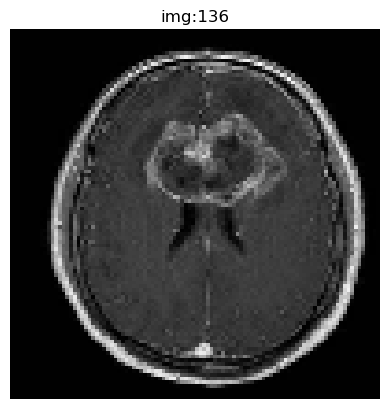

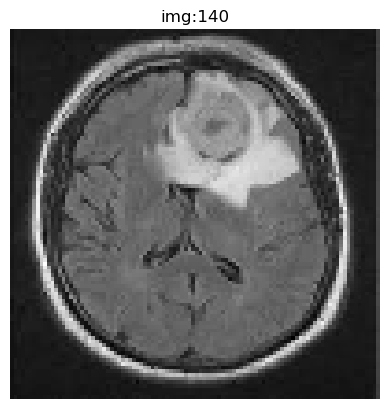

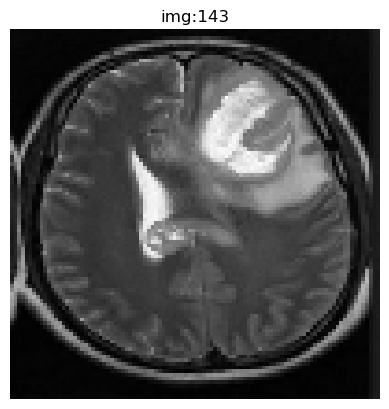

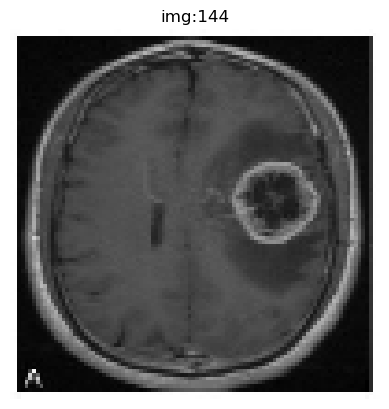

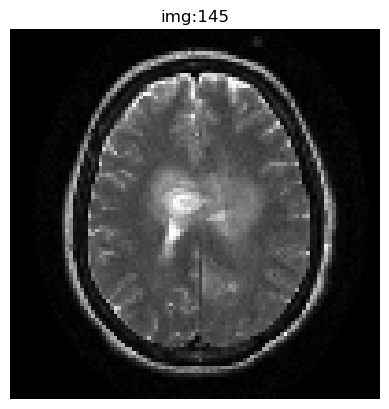

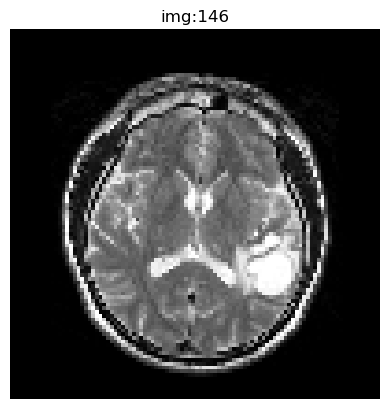

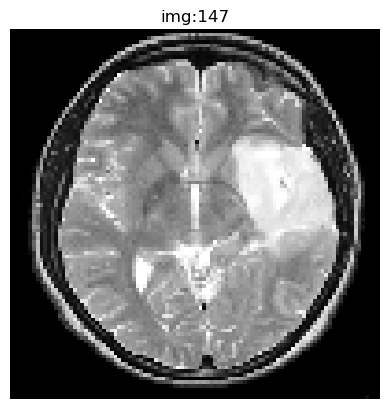

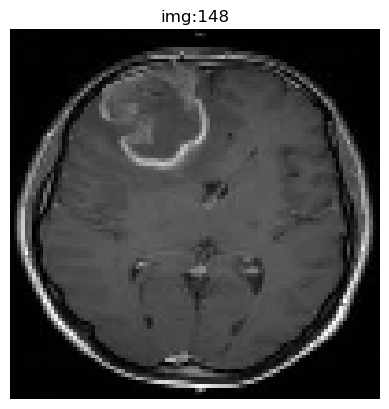

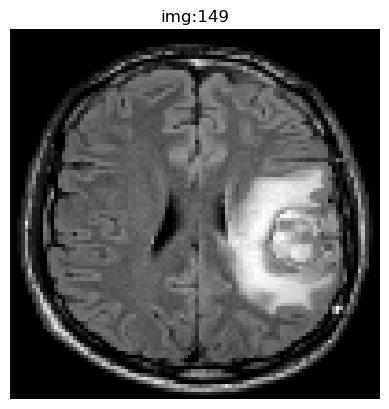

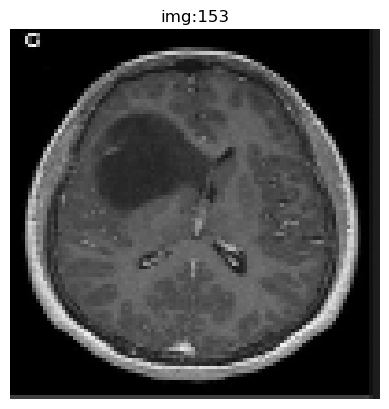

In [12]:
for i in range(len(training_data)):
    plt.imshow(training_data[i][0],cmap='gray')
    plt.title(f'img:{i}')
    plt.axis('off')
    plt.show()

In [13]:
### shuffling our training data
import random
random.shuffle(training_data)


In [17]:
#taking feature and labels from training data
x = []
y = []

for feature, labels in training_data:
    x.append(feature)
    y.append(labels)

y = np.array(y)
x = np.array(x).reshape(-1,img_size,img_size,1)


In [18]:
#taking validation data
validation_data = []
DataDir = "archive/brain_tumor_dataset/"

In [20]:
validation_data = []
def create_validation_data():
    for i in CATEGORIES:
        path = os.path.join(DataDir,i)
        class_num = CATEGORIES.index(i)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(img_size,img_size))
            validation_data.append([new_array,class_num])
        except Exception as e:
            pass

In [21]:
create_validation_data()

In [22]:
len(validation_data)

155

In [23]:
import random
random.shuffle(validation_data)

In [26]:
### taking feature and labels from the validation data
val_x = []
val_y = []
for feature,labels in validation_data:
    val_x.append(feature)
    val_y.append(labels)
val_y = np.array(val_y)
val_x = np.array(val_x).reshape(-1,img_size,img_size,1)

In [28]:
#just scaling our feature 
x = x/255.0
val_x = val_x/255.0

In [27]:
#MODEL PART START
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Activation,Flatten
import pickle

In [30]:
x.shape[1:]

(100, 100, 1)

In [31]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape = x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# flatten layer
model.add(Flatten())
#hidden later
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
#output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\ddeba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,638,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.fit(x,y,batch_size=4,epochs=30,validation_data=(val_x,val_y))

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accura

In [34]:
model.save(r"model_10.h5")

In [41]:
## importing libraries for testing the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
CATEGORIES = ['no','yes']
#function preparing the image for prediction
def prepare(image):
    img_size = 100
    img_array = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(img_size,img_size))
    new_array = tf.keras.preprocessing.image.img_to_array(new_array)
    return new_array.reshape(-1,img_size,img_size,1)

#loading the model
model = tf.keras.models.load_model(r'model10.h5')
image = 'archive/yes/Y1.jpg'
prediction = model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])
##lets see the image 
img = mpimg.imread(image)
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[1.]]
1
yes


Text(0.5, 1.0, 'yes')